In [1]:
from data_loader import DataLoader
from preprocessing import prepare_data
from models import FeatureEngineeredModel, DeepLearningModel
from utils import plot_confusion_matrix

Using TensorFlow backend.


In [2]:
# data file
data_file = "challenge_dataset.xlsx"

# train and test files
train_file = "train.csv"
test_file = "test.csv"

# test size
test_size = 0.2

In [3]:
# prepare train and test datasets
prepare_data(data_file, train_file, test_file, test_size, gen=False)

In [4]:
# define dataset loader
data_loader = DataLoader(train_file, test_file)

In [5]:
# Feature Engineered Model
X_train, y_train, X_test, y_test, train_ids, test_ids = data_loader.get_train_test_data()
traditional_model = FeatureEngineeredModel(X_train, y_train, X_test, y_test, train_ids, test_ids)

Feature Extraction: 100%|██████████| 30/30 [01:08<00:00,  1.00s/it]
 'bl__fft_coefficient__coeff_45__attr_"angle"'
 'bl__fft_coefficient__coeff_45__attr_"imag"' ...
 'vz__fft_coefficient__coeff_99__attr_"angle"'
 'vz__fft_coefficient__coeff_99__attr_"imag"'
 'vz__fft_coefficient__coeff_99__attr_"real"'] did not have any finite values. Filling with zeros.


Selected Features: 578/11116


In [6]:
tm_best_model, tm_best_score = traditional_model.evaluate()

Training Random Forest
Accuracy: 63.41463414634146% with n_estimators=150
Training XGBoost
Accuracy: 63.41463414634146% with n_estimators=250


In [7]:
X_train, y_train, X_test, y_test, train_ids, test_ids = data_loader.get_train_test_data_norm()
deep_learning_model = DeepLearningModel(X_train, y_train, X_test, y_test, train_ids, test_ids)

In [8]:
dl_best_model, dl_best_score = deep_learning_model.evaluate()

Training LSTM
Accuracy: Max:58.53658594736238% Avg:56.098% (+/-3.779)
Training CNN1D-LSTM
Accuracy: Max:65.85365897271691% Avg:58.049% (+/-4.729)
Training CNN2D-LSTM
Accuracy: Max:65.8536591180941% Avg:57.561% (+/-6.829)


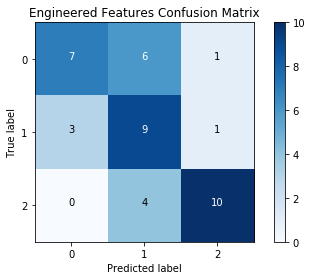

In [11]:
plot_confusion_matrix(traditional_model.get_confusion_matrix(), classes = [0,1,2], 
                      title = "Engineered Features Confusion Matrix")

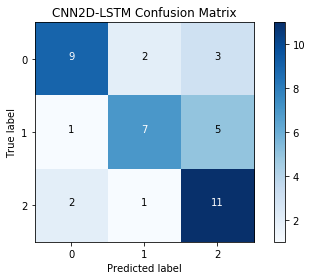

In [12]:
plot_confusion_matrix(deep_learning_model.get_confusion_matrix(), classes = [0,1,2], 
                      title = deep_learning_model.best_model_name + " Confusion Matrix")